## Step 1: Reading and Understanding the data

In [818]:
# Supress Warning
import warnings
warnings.filterwarnings('ignore')

In [819]:
# import necessary libraries
import numpy as np
import pandas as pd

In [820]:
# Read the data into a dataframe
bike=pd.read_csv('day.csv')

In [821]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Inspecting the various aspects of the bike dataframe

In [822]:
bike.shape

(730, 16)

In [823]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [824]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [825]:
# checking percentage of missing values in columns
round((bike.isnull().sum()/len(bike))* 100, 2).sort_values(ascending=False)


cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [826]:
# checking percentage of missing values in rows
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

#### Observation
There are 730 rows and 16 columns in the dataset.<br>
Except the date column others are either integer type or Float Type.<br>
There are no missing or null values in columns or rows.<br>
Some fields which are actually categorical in nature are given as Integer/ Float.

#### Converting to appropriate datatype

In [827]:
# Datatype of dteday is object in the dataset, it should be converted to datetime.
bike['dteday'] = bike['dteday'].astype('datetime64')



In [828]:
# season, yr, mnth, holyday,weekday, workingday,weathersit should be converted to categorical variable. 
# Converting season to categorical 
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [829]:
# season (1:spring, 2:summer, 3:fall, 4:winter)
def assign_season(x):
    if x==1:
        return 'spring'
    elif x==2:
         return 'summer'
    elif x==3:
         return 'fall'
    else:
         return 'winter'
bike['season']=bike['season'].apply(assign_season)

In [830]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [831]:
# Converting yr to categorical 
bike['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [832]:
# year (0: 2018, 1:2019)
def assign_yr(x):
    if x==1:
        return '2019'
    else:
         return '2018'
bike['yr']=bike['yr'].apply(assign_yr)

In [833]:
bike['yr'].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [834]:
# Converting mnth to categorical 
bike['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [835]:
# month ( 1 to 12)
def assign_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
    })
bike[['mnth']]=bike[['mnth']].apply(assign_mnth)

In [836]:
bike['mnth'].value_counts()

Aug    62
Dec    62
Jan    62
May    62
Jul    62
Mar    62
Oct    62
Sep    60
Jun    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [837]:
# Converting holiday to categorical 
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [838]:
# Holiday 0-No, 1, Yes
def assign_holiday(x):
    if x==0:
        return 'No'
    else:
         return 'Yes'
bike['holiday']=bike['holiday'].apply(assign_holiday)

In [839]:
# Converting weekday to categorical 
bike['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [840]:
# weekday ( 1 to 7)  Sun to Sat
def assign_weekday(x):
    return x.map({
        1:'Sun',
        2:'Mon',
        3:'Tue',
        4:'Wed',
        5:'Thu',
        6:'Fri',
        7:'Sat',
       
    })
bike[['weekday']]=bike[['weekday']].apply(assign_weekday)

In [841]:
# Converting workingday to categorical 
bike['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [842]:
# workingday is a holiday or Weekend means No(0) otherwise Yes(1)
# Holiday 0-No, 1, Yes
def assign_workingday(x):
    if x==0:
        return 'No'
    else:
         return 'Yes'
bike['workingday']=bike['workingday'].apply(assign_workingday)

In [843]:
# Converting weathersit to categorical 
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [844]:
 # weathersit- (1->Clear,2->Mist,3->Light,4->Heavy)
def assign_weathersit(x):
    if x==1:
        return 'Clear'
    elif x==2:
         return 'Mist'
    elif x==3:
         return 'Light'
    else:
        return 'Heavy '
bike['weathersit']=bike['weathersit'].apply(assign_weathersit)

In [845]:
# Check the datatypes after convertion
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     626 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Observation :
We can see that the datatypes of dteday, season, yr, mnth, holiday, weekday, workingday and weathersit are now changed.

## Step 2: Visualizing the Data
We'll visualize our data using `matplotlib` and `seaborn`.

In [846]:
import matplotlib.pyplot as plt
import seaborn as sns

In [847]:
# Analyzing numerical variable
num_col = bike[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
num_col

instant       temp     atemp      hum  windspeed  casual  registered  \
0          1  14.110847  18.18125  80.5833  10.749882     331         654   
1          2  14.902598  17.68695  69.6087  16.652113     131         670   
2          3   8.050924   9.47025  43.7273  16.636703     120        1229   
3          4   8.200000  10.60610  59.0435  10.739832     108        1454   
4          5   9.305237  11.46350  43.6957  12.522300      82        1518   
..       ...        ...       ...      ...        ...     ...         ...   
725      726  10.420847  11.33210  65.2917  23.458911     247        1867   
726      727  10.386653  12.75230  59.0000  10.416557     644        2451   
727      728  10.386653  12.12000  75.2917   8.333661     159        1182   
728      729  10.489153  11.58500  48.3333  23.500518     364        1432   
729      730   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 8 columns]

###### Instant is just an index value. For analysis it is not required. We can remove that column

In [848]:
x = num_col.columns
x =x[1:]
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

#### Visualizing Numeric Variables

Let's make a pairplot of all the numeric variables

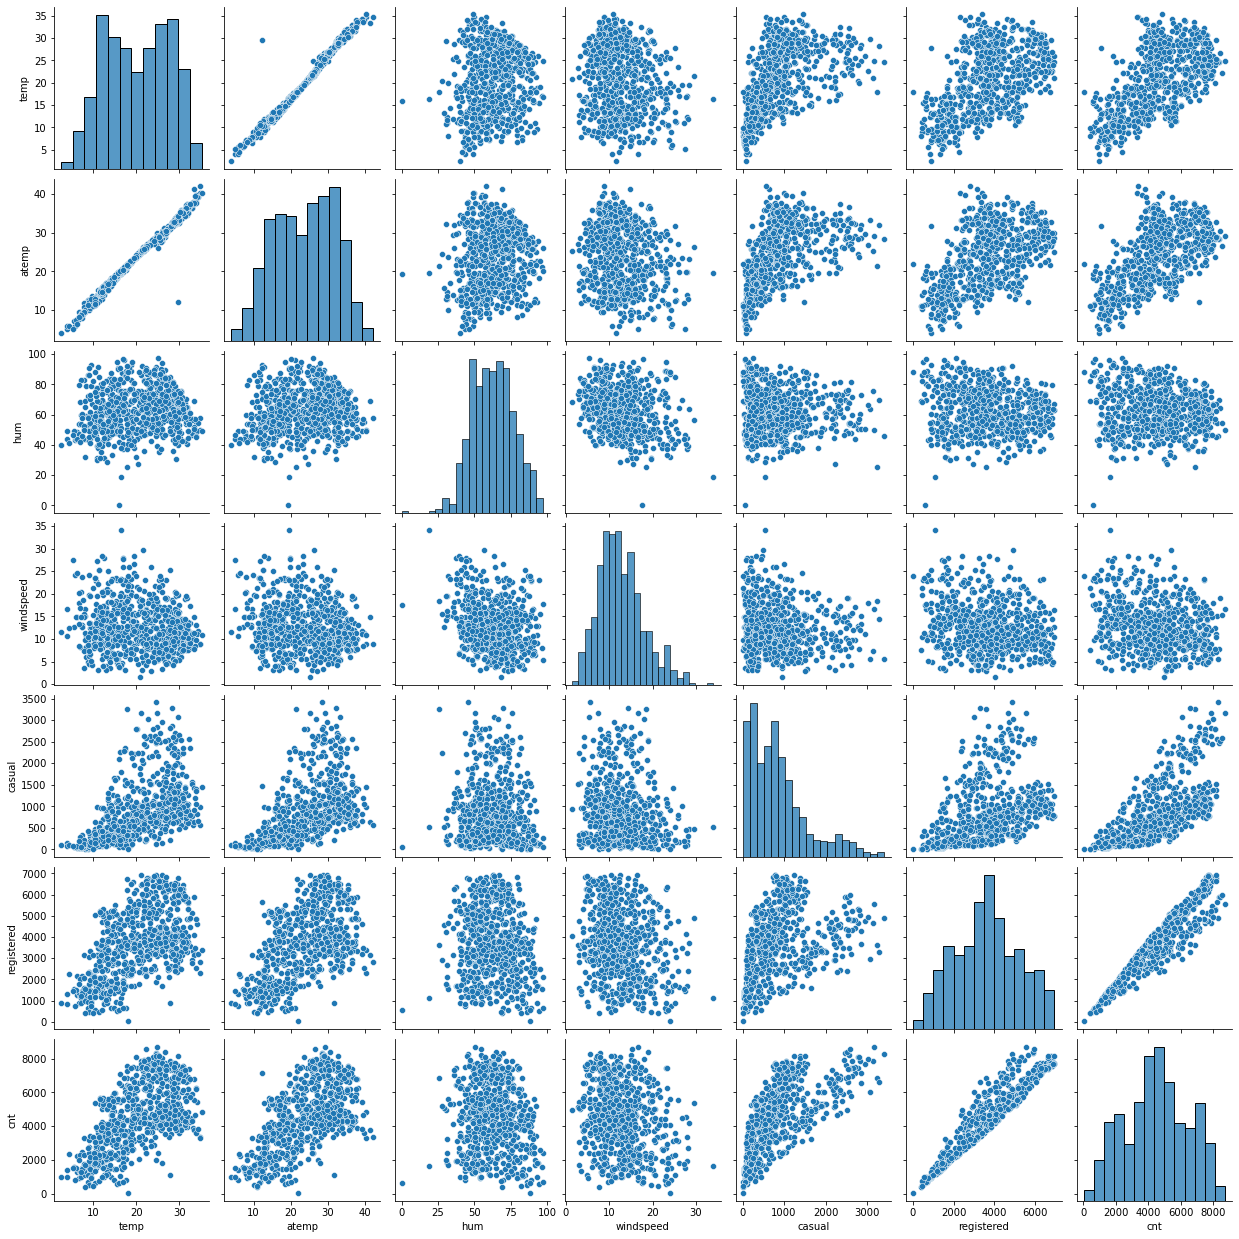

In [849]:
sns.pairplot(bike[x])
plt.show()

<AxesSubplot:>

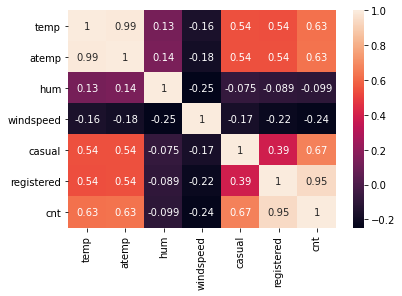

In [850]:
# plot heatmap
sns.heatmap(bike[x].corr(), annot=True)

#### Insights
1.We can see that temp and atemp are related so closely. Its highly positive correlation.<br>
Its a problem of collinearity.<br>
2.casual Vs registered and casual Vs cnt is also a good relation.<br>
3. registered Vs cnt has high correlation.

#### Visualizing Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

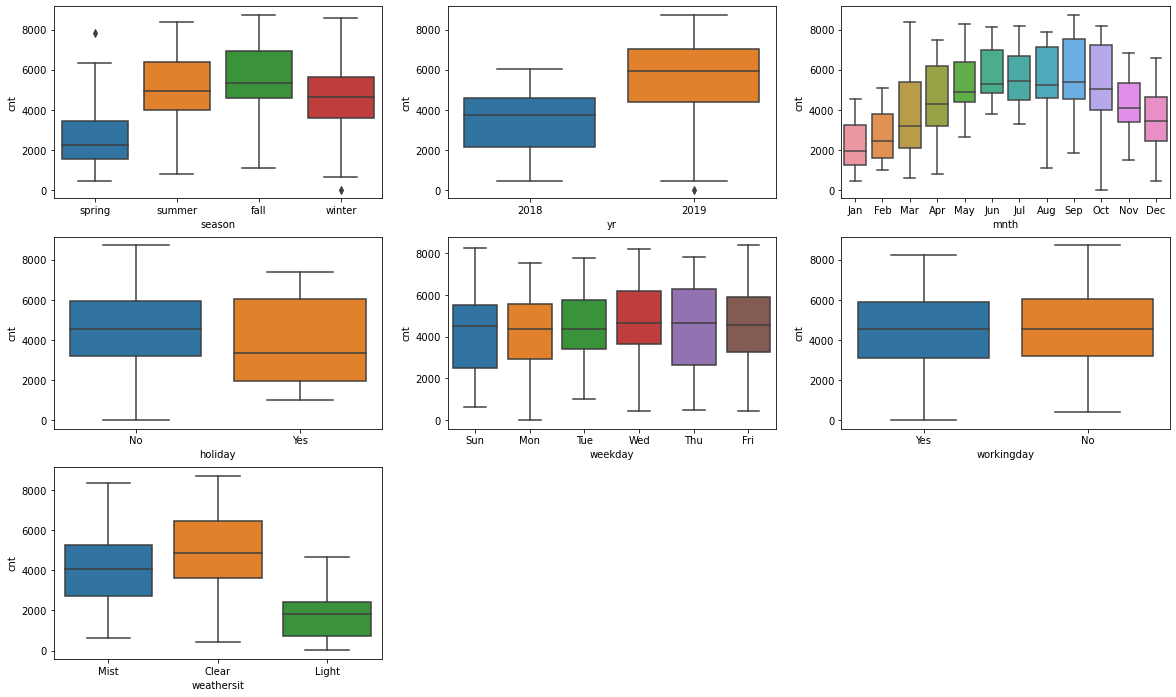

In [851]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

#### Insights
1.Season<br>
Almost 30% of the  booking  is happening in Season fall with a median of over 5000 booking which is followed by season summer and season winter. Season is good predictor for the dependent variable.<br>
2.yr<br>
Almost 60% of the booking happened in the year 2019 with a median of around 5800.<br>
3.mnth<br>
There is a median of 4000 booking per month happening  in the month May, Jun, Jul, Aug and Sep.<br>
So month can be  a good predictor.<br>
4.Weathersit<br>
Almost 45% of the bike booking happening during weather clear  followed by Mist. So weathersit would show some trend towards bike booking.


In [852]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step 3: Data Preparation

- Bike dataset has some columns with values as 'Yes' or 'No'.

- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [853]:
# List of variables to map

varlist =  ['holiday', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the bike list
bike[varlist] = bike[varlist].apply(binary_map)


In [854]:
# Mapping the yr column (2018->0 and 2019->1)
def assign_yr(x):
    if x=='2019':
        return 1
    else:
         return 0
bike['yr']=bike['yr'].apply(assign_yr)

In [855]:
bike.head(10)

instant     dteday  season  yr mnth  holiday weekday  workingday  \
0        1 2018-01-01  spring   0  Jan        0     Sun           1   
1        2 2018-02-01  spring   0  Jan        0     Mon           1   
2        3 2018-03-01  spring   0  Jan        0     Tue           1   
3        4 2018-04-01  spring   0  Jan        0     Wed           1   
4        5 2018-05-01  spring   0  Jan        0     Thu           1   
5        6 2018-06-01  spring   0  Jan        0     Fri           0   
6        7 2018-07-01  spring   0  Jan        0     NaN           0   
7        8 2018-08-01  spring   0  Jan        0     Sun           1   
8        9 2018-09-01  spring   0  Jan        0     Mon           1   
9       10 2018-10-01  spring   0  Jan        0     Tue           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5      Clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6       Mist   8.057402  10.44195  49.8696  11.304642     148        1362   
7       Mist   6.765000   8.11270  53.5833  17.875868      68         891   
8      Clear   5.671653   5.80875  43.4167  24.250650      54         768   
9      Clear   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

### Dummy Variables

##### We will create Dummy variables for categorical variables in the dataset



In [856]:
bike_categorical= bike.select_dtypes(include=['object'])

In [857]:
bike_categorical.columns


Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [858]:

# Get the dummy variables for the feature 'season' and store it in a new variable - 'season-status'
season_status = pd.get_dummies(bike_categorical['season'])

In [859]:
# Check what the dataset 'season_status' looks like
season_status.head()

fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [860]:
# Let's drop the first column from season_status dataframe using 'drop_first = True'

season_status = pd.get_dummies(bike_categorical['season'], drop_first = True)

In [861]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season_status], axis = 1)

In [862]:
# Now let's see the head of our dataframe.

bike.head()

instant     dteday  season  yr mnth  holiday weekday  workingday  \
0        1 2018-01-01  spring   0  Jan        0     Sun           1   
1        2 2018-02-01  spring   0  Jan        0     Mon           1   
2        3 2018-03-01  spring   0  Jan        0     Tue           1   
3        4 2018-04-01  spring   0  Jan        0     Wed           1   
4        5 2018-05-01  spring   0  Jan        0     Thu           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  spring  summer  winter  
0   985       1       0       0  
1   801       1       0       0  
2  1349       1       0       0  
3  1562       1       0       0  
4  1600       1       0       0

In [863]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [864]:
bike.head()

instant     dteday  yr mnth  holiday weekday  workingday weathersit  \
0        1 2018-01-01   0  Jan        0     Sun           1       Mist   
1        2 2018-02-01   0  Jan        0     Mon           1       Mist   
2        3 2018-03-01   0  Jan        0     Tue           1      Clear   
3        4 2018-04-01   0  Jan        0     Wed           1      Clear   
4        5 2018-05-01   0  Jan        0     Thu           1      Clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  spring  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985       1   
1  14.902598  17.68695  69.6087  16.652113     131         670   801       1   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349       1   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562       1   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [865]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth-status'
mnth_status = pd.get_dummies(bike_categorical['mnth'])

In [866]:
# Check what the dataset 'mnth_status' looks like
mnth_status.head()

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    0    1    0    0    0    0    0    0    0

In [867]:
# Let's drop the first column from mnth_status dataframe using 'drop_first = True'

mnth_status = pd.get_dummies(bike_categorical['mnth'], drop_first = True)

In [868]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, mnth_status], axis = 1)

In [869]:
bike.head()

instant     dteday  yr mnth  holiday weekday  workingday weathersit  \
0        1 2018-01-01   0  Jan        0     Sun           1       Mist   
1        2 2018-02-01   0  Jan        0     Mon           1       Mist   
2        3 2018-03-01   0  Jan        0     Tue           1      Clear   
3        4 2018-04-01   0  Jan        0     Wed           1      Clear   
4        5 2018-05-01   0  Jan        0     Thu           1      Clear   

        temp     atemp  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
0  14.110847  18.18125  ...    0    0    1    0    0    0    0    0    0    0  
1  14.902598  17.68695  ...    0    0    1    0    0    0    0    0    0    0  
2   8.050924   9.47025  ...    0    0    1    0    0    0    0    0    0    0  
3   8.200000  10.60610  ...    0    0    1    0    0    0    0    0    0    0  
4   9.305237  11.46350  ...    0    0    1    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [870]:
# Drop 'mnth' as we have created the dummies for it

bike.drop(['mnth'], axis = 1, inplace = True)

In [871]:

# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_status'
weekday_status = pd.get_dummies(bike_categorical['weekday'])

In [872]:
# Check what the dataset 'weekday_status' looks like
weekday_status.head()

Fri  Mon  Sun  Thu  Tue  Wed
0    0    0    1    0    0    0
1    0    1    0    0    0    0
2    0    0    0    0    1    0
3    0    0    0    0    0    1
4    0    0    0    1    0    0

In [873]:
# Let's drop the first column from weekday_status dataframe using 'drop_first = True'

weekday_status = pd.get_dummies(bike_categorical['weekday'], drop_first = True)

In [874]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weekday_status], axis = 1)

In [875]:
# Drop 'weekday' as we have created the dummies for it

bike.drop(['weekday'], axis = 1, inplace = True)

In [876]:
bike.head()

instant     dteday  yr  holiday  workingday weathersit       temp  \
0        1 2018-01-01   0        0           1       Mist  14.110847   
1        2 2018-02-01   0        0           1       Mist  14.902598   
2        3 2018-03-01   0        0           1      Clear   8.050924   
3        4 2018-04-01   0        0           1      Clear   8.200000   
4        5 2018-05-01   0        0           1      Clear   9.305237   

      atemp      hum  windspeed  ...  Mar  May  Nov  Oct  Sep  Mon  Sun  Thu  \
0  18.18125  80.5833  10.749882  ...    0    0    0    0    0    0    1    0   
1  17.68695  69.6087  16.652113  ...    0    0    0    0    0    1    0    0   
2   9.47025  43.7273  16.636703  ...    0    0    0    0    0    0    0    0   
3  10.60610  59.0435  10.739832  ...    0    0    0    0    0    0    0    0   
4  11.46350  43.6957  12.522300  ...    0    0    0    0    0    0    0    1   

   Tue  Wed  
0    0    0  
1    0    0  
2    1    0  
3    0    1  
4    0    0  

[5 rows x 32 columns]

In [877]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_status'
weathersit_status = pd.get_dummies(bike_categorical['weathersit'])

In [878]:
# Check what the dataset 'weathersit_status' looks like
weathersit_status.head()

Clear  Light  Mist
0      0      0     1
1      0      0     1
2      1      0     0
3      1      0     0
4      1      0     0

In [879]:
# Let's drop the first column from weathersit_status dataframe using 'drop_first = True'

weathersit_status = pd.get_dummies(bike_categorical['weathersit'], drop_first = True)

In [880]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weathersit_status], axis = 1)

In [881]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [882]:
bike.head()


instant     dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1 2018-01-01   0        0           1  14.110847  18.18125  80.5833   
1        2 2018-02-01   0        0           1  14.902598  17.68695  69.6087   
2        3 2018-03-01   0        0           1   8.050924   9.47025  43.7273   
3        4 2018-04-01   0        0           1   8.200000  10.60610  59.0435   
4        5 2018-05-01   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  Nov  Oct  Sep  Mon  Sun  Thu  Tue  Wed  Light  Mist  
0  10.749882     331  ...    0    0    0    0    1    0    0    0      0     1  
1  16.652113     131  ...    0    0    0    1    0    0    0    0      0     1  
2  16.636703     120  ...    0    0    0    0    0    0    1    0      0     0  
3  10.739832     108  ...    0    0    0    0    0    0    0    1      0     0  
4  12.522300      82  ...    0    0    0    0    0    1    0    0      0     0  

[5 rows x 33 columns]

In [883]:
# Now we can drop instant and dteday as they wont be useful for our modelling
bike=bike.drop(['instant','dteday'],axis=1)

In [884]:
list(bike.columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'spring',
 'summer',
 'winter',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep',
 'Mon',
 'Sun',
 'Thu',
 'Tue',
 'Wed',
 'Light',
 'Mist']

In [885]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  Jul         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Mar         730 non-null    u

In [886]:
# We can drop casual and registered columns. We need to predict the cnt. Cnt is the target variable we have to predict.
# Cnt is the sum of casual and registered variables. 
bike.drop(['casual','registered'],axis=1,inplace=True)


In [887]:
# drop atemp as it is least importance
bike.drop(['atemp'],axis=1,inplace=True)

In [888]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  Nov  Oct  Sep  Mon  Sun  Thu  Tue  Wed  Light  Mist  
0       0       0  ...    0    0    0    0    1    0    0    0      0     1  
1       0       0  ...    0    0    0    1    0    0    0    0      0     1  
2       0       0  ...    0    0    0    0    0    0    1    0      0     0  
3       0       0  ...    0    0    0    0    0    0    0    1      0     0  
4       0       0  ...    0    0    0    0    0    1    0    0      0     0  

[5 rows x 28 columns]

## Step 4: Splitting the Data into Training and Testing Sets

In [889]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
bike_train,bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 350)

### Rescaling the Features 

In [890]:
from sklearn.preprocessing import MinMaxScaler

In [891]:
scaler = MinMaxScaler()

In [892]:
# Checking the values before scaling
bike_train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
229   0        0           0  29.178347  65.4583  15.624936  3805       0   
86    0        0           1  10.838268  30.2174  14.217668  2028       0   
465   1        0           1  14.296536  46.9565  19.783358  4862       0   
182   0        0           1  30.271653  44.4583   7.709154  5119       0   
341   0        0           0  10.899153  58.0000  16.083886  3322       0   

     summer  winter  ...  Nov  Oct  Sep  Mon  Sun  Thu  Tue  Wed  Light  Mist  
229       0       0  ...    0    0    0    0    0    0    0    0      0     0  
86        1       0  ...    0    0    0    0    0    0    1    0      0     0  
465       1       0  ...    0    0    0    0    0    0    0    1      0     0  
182       0       0  ...    0    0    0    0    1    0    0    0      0     0  
341       0       1  ...    0    0    0    0    0    0    0    0      0     0  

[5 rows x 28 columns]

In [893]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light', 'Mist'],
      dtype='object')

In [894]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])


In [895]:
# Checking the values after scaling
bike_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
229   0        0           0  0.813093  0.594795   0.434609  0.435228       0   
86    0        0           1  0.255711  0.145628   0.391308  0.230787       0   
465   1        0           1  0.360813  0.358978   0.562561  0.556834       0   
182   0        0           1  0.846320  0.327137   0.191045  0.586401       0   
341   0        0           0  0.257562  0.499734   0.448731  0.379659       0   

     summer  winter  ...  Nov  Oct  Sep  Mon  Sun  Thu  Tue  Wed  Light  Mist  
229       0       0  ...    0    0    0    0    0    0    0    0      0     0  
86        1       0  ...    0    0    0    0    0    0    1    0      0     0  
465       1       0  ...    0    0    0    0    0    0    0    1      0     0  
182       0       0  ...    0    0    0    0    1    0    0    0      0     0  
341       0       1  ...    0    0    0    0    0    0    0    0      0     0  

[5 rows x 28 columns]

In [896]:
bike_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.494118    0.035294    0.686275    0.548366    0.556119    0.350537   
std      0.500456    0.184703    0.464462    0.223762    0.176241    0.162957   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.355429    0.423261    0.232055   
50%      0.000000    0.000000    1.000000    0.544672    0.561338    0.327568   
75%      1.000000    0.000000    1.000000    0.747156    0.680384    0.441027   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...         Nov  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.519485    0.243137    0.268627    0.239216  ...    0.078431   
std      0.221995    0.429398    0.443681    0.427024  ...    0.269113   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.362546    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.523470    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.683473    0.000000    1.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Oct         Sep         Mon         Sun         Thu         Tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.092157    0.080392    0.139216    0.152941    0.127451    0.149020   
std      0.289531    0.272166    0.346511    0.360284    0.333805    0.356457   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed       Light        Mist  
count  510.000000  510.000000  510.000000  
mean     0.149020    0.023529    0.345098  
std      0.356457    0.151726    0.475867  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

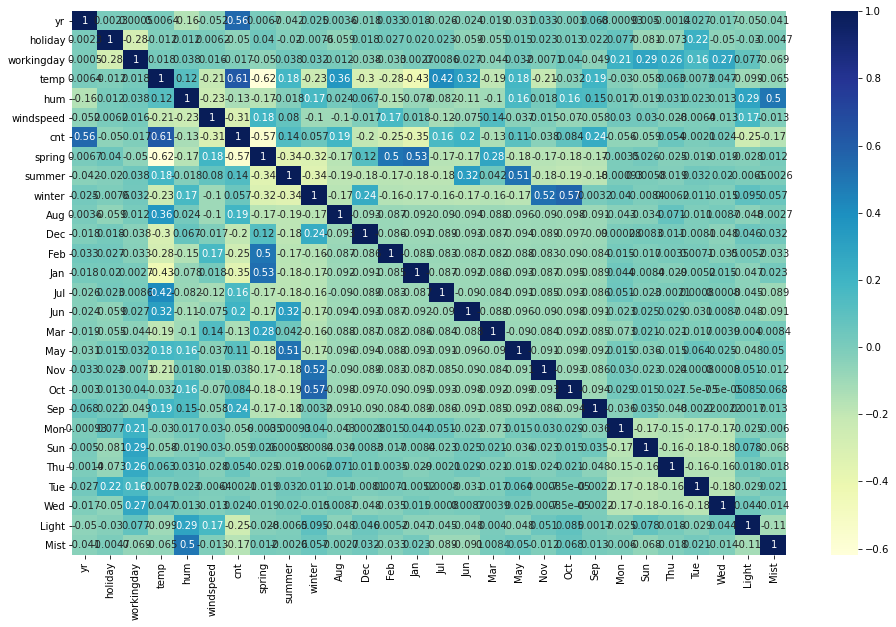

In [897]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observation
We can see some variables are highly correlated with the target variable. For eg temp and cnt are highly correlated.


### Dividing into X and Y sets for the model building

In [898]:
### Dividing into X and Y sets for the model building
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model


 ##### RFE
 Recursive Feature Elimination: we will be using the **LinearRegression function from SciKit Learn** for its compatibility with  RFE (which is a utility from sklearn)


In [899]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [900]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)# running RFE
rfe = rfe.fit(X_train, y_train)

In [901]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 13),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sun', False, 4),
 ('Thu', False, 9),
 ('Tue', False, 5),
 ('Wed', False, 7),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [902]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jan', 'Jul', 'Mar', 'Nov', 'Sep', 'Light', 'Mist'],
      dtype='object')

In [903]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jun', 'May', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [904]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### MODEL 1 

##### Checking VIF

In [905]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  18.31
2        temp  14.84
4   windspeed   4.98
5      spring   3.18
6      winter   2.57
14       Mist   2.42
0          yr   2.00
8         Jan   1.86
11        Nov   1.69
7         Dec   1.51
9         Jul   1.43
13      Light   1.40
10        Mar   1.37
12        Sep   1.21
1     holiday   1.05

In [906]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [907]:
# Print a summary of the linear regression model obtained
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          3.73e-185
Time:                        00:01:38   Log-Likelihood:                 510.98
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     494   BIC:                            -922.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3805      0.031     12.404      0.0

#### MODEL 2

In [908]:
# Removing the variable 'Jan' based on High p value
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

### Checking VIF

In [909]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  17.51
2        temp  14.16
4   windspeed   4.96
6      winter   2.57
5      spring   2.55
13       Mist   2.40
0          yr   1.98
10        Nov   1.67
8         Jul   1.43
7         Dec   1.39
12      Light   1.38
9         Mar   1.22
11        Sep   1.21
1     holiday   1.05

In [910]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [911]:
# Print a summary of the linear regression model obtained
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.2
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          6.56e-186
Time:                        00:01:38   Log-Likelihood:                 510.06
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     495   BIC:                            -926.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3699      0.030     12.474      0.0

#### MODEL 3

In [912]:
# Removing the variable 'holiday' based on its Very P value.
X_train_new = X_train_new.drop(["holiday"], axis = 1)

#### Checking VIF

In [913]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2         hum  17.48
1        temp  14.16
3   windspeed   4.96
5      winter   2.57
4      spring   2.55
12       Mist   2.40
0          yr   1.98
9         Nov   1.67
7         Jul   1.42
6         Dec   1.39
11      Light   1.38
8         Mar   1.22
10        Sep   1.21

In [914]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [915]:
# Print a summary of the linear regression model obtained
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.3
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          1.96e-186
Time:                        00:01:39   Log-Likelihood:                 508.55
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3705      0.030     12.472      0.0

#### Model 4

In [916]:
# Removing the variable 'hum' based on its high VIF value.
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Checking VIF

In [917]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1        temp  4.99
2   windspeed  4.93
4      winter  2.25
0          yr  1.96
3      spring  1.91
8         Nov  1.65
11       Mist  1.54
6         Jul  1.36
5         Dec  1.35
7         Mar  1.22
9         Sep  1.19
10      Light  1.09

In [918]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [919]:
# Print a summary of the linear regression model obtained
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.4
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          2.02e-183
Time:                        00:01:39   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     497   BIC:                            -916.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3039      0.026     11.636      0.0

#### MODEL 5

In [920]:
# Removing the variable 'Dec' based on its  p-value.
X_train_new = X_train_new.drop(["Dec"], axis = 1)

#### Checking VIF

In [921]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1        temp  4.98
2   windspeed  4.92
0          yr  1.96
4      winter  1.89
3      spring  1.83
10       Mist  1.53
7         Nov  1.52
5         Jul  1.36
6         Mar  1.20
8         Sep  1.19
9       Light  1.09

In [922]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [923]:
# Print a summary of the linear regression model obtained
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.3
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          2.60e-183
Time:                        00:01:40   Log-Likelihood:                 495.56
No. Observations:                 510   AIC:                            -967.1
Df Residuals:                     498   BIC:                            -916.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2912      0.026     11.319      0.0

### MODEL 6

In [924]:
# Removing the variable 'Nov' 
X_train_new = X_train_new.drop(["Nov"], axis = 1)

In [925]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1       temp  4.94
2  windspeed  4.87
0         yr  1.96
3     spring  1.83
9       Mist  1.53
4     winter  1.41
5        Jul  1.36
6        Mar  1.20
7        Sep  1.18
8      Light  1.09

In [926]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [927]:
# Print a summary of the linear regression model obtained
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 31 Dec 2020   Prob (F-statistic):          2.54e-183
Time:                        00:01:40   Log-Likelihood:                 492.74
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     499   BIC:                            -916.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2833      0.026     11.055      0.0

#### Insights
This model looks good as there are very low Multicollinearity between the predictors and the p-values for all the predictors are significant.We will consider this as our final model.

From the linear model 6 summary, all the coefficients are not equal to zero which means that we can reject the null hypothesis.
The model is significant<br>
F-statistics- 239.6<br>
Prob (F-statistic):2.54e-183<br>
So, overall the model is significant.



## Residual Analysis of the train data



#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [928]:
y_train_pred = lm6.predict(X_train_lm6)

In [929]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

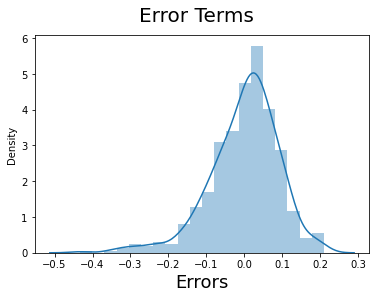

In [930]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation
Error terms(Residuals) are normally distributed. Assumptions of our model is valid.


## Making Predictions

#### Applying the scaling on the test sets

In [931]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

#### Dividing into X_test and y_test

In [932]:
y_test = bike_test.pop('cnt')
X_test =bike_test

In [933]:
#Selecting the variables that were part of final model.

X_test=X_test[X_train_new.columns]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   temp       219 non-null    float64
 3   windspeed  219 non-null    float64
 4   spring     219 non-null    uint8  
 5   winter     219 non-null    uint8  
 6   Jul        219 non-null    uint8  
 7   Mar        219 non-null    uint8  
 8   Sep        219 non-null    uint8  
 9   Light      219 non-null    uint8  
 10  Mist       219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [934]:
# Making predictions using the final model (lm6)

y_pred = lm6.predict(X_test_lm6)

## Model Evaluation


Text(0, 0.5, 'y_pred')

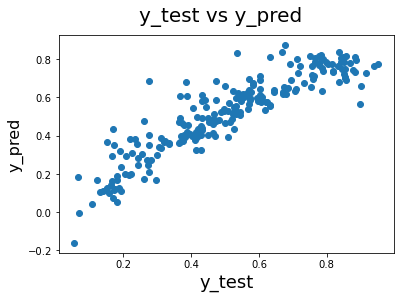

In [935]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### The equation of our best fitted line on model lm6:¶


cnt = 0.2833+ 0.2340  \times  yr + 0.4162 \times temp - 0.1548 \times windspeed - 0.1498 \times spring + 0.0348 \times winter + - 0.0495 \times Jul + 0.0585 \times Mar + 0.0594 \times Sep - 0.2906 \times Light - 0.0689 \times Mist 



R^2 Value for TEST

In [936]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8094980190363017

In [937]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [938]:
# n is number of rows in X
r2=0.8094980190363017
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8003392699515085

### Final Result 
Train R Squared :0.828<br>
Train Adjusted Squared :0.824<br>
Test R Squared :0.809<br>
Test Adjusted Squared :0.800<br>
This seems to be a good model<br>

#### Top 3 predictor variables are the following-
1.	temp: A coefficient value of  0.4162 indicates that a unit increase in temp variable increases the bike hire count by 0.4162 units.<br>
2.	yr: A coefficient of  0.2340 indicates that a unit increase in yr variable increases the bike hire count by 0.2340 units.<br>
3.	light(Weathersit):  A coefficient of -0.2906 indicates that a unit increase in light variable decreases the bike hire count by 2906 units.<br>
